<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [3]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

URLError: <urlopen error [WinError 10054] 远程主机强迫关闭了一个现有的连接。>

In [4]:
df = pd.read_csv(r"D:\Down\m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\Geek\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

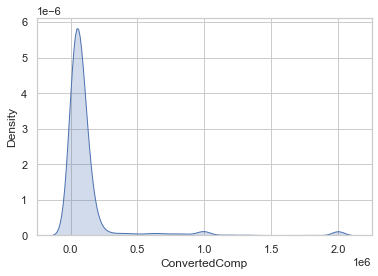

In [5]:
# your code goes here
import seaborn as sns

# 设置为Seaborn样式
sns.set(style="whitegrid")

# 绘制分布曲线
sns.kdeplot(df['ConvertedComp'], shade=True)


Plot the histogram for the column `ConvertedComp`.


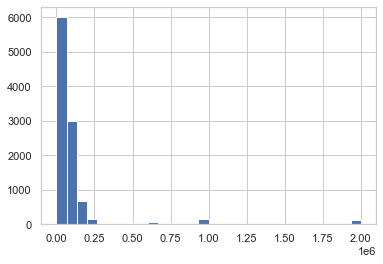

In [6]:
# your code goes here
import matplotlib.pyplot as plt

# 绘制直方图
plt.hist(df['ConvertedComp'], bins=30)
plt.show()


What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()
print(median_converted_comp)


57745.0


How many responders identified themselves only as a **Man**?


In [8]:
# your code goes here
count_man = df[df['Gender'] == 'Man'].shape[0]
print(count_man)


10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
# your code goes here
median_woman_converted_comp = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(median_woman_converted_comp)


57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [10]:
# your code goes here
five_num_summary_age = df['Age'].describe()
print(five_num_summary_age)


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


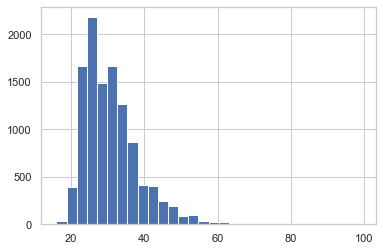

In [11]:
# your code goes here
plt.hist(df['Age'], bins=30)
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:xlabel='ConvertedComp'>

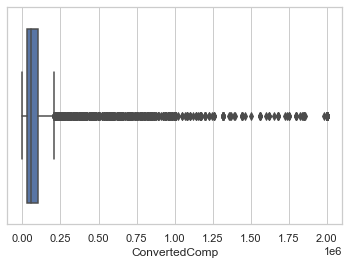

In [12]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'])


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [13]:
# your code goes here
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


73132.0


Find out the upper and lower bounds.


In [14]:
# your code goes here
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)


-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [15]:
# your code goes here
outliers_count = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].shape[0]
print(outliers_count)


879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [16]:
# your code goes here
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [17]:
# your code goes here
correlation = df.corr()
age_correlation = correlation['Age']
print(age_correlation)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


The median Age of survey respondents is: 29.0


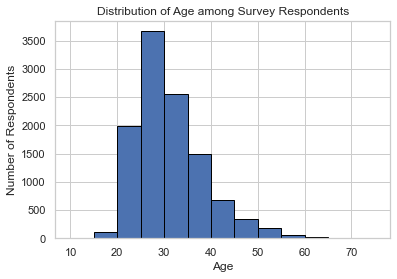

In [18]:
# 计算中位年龄
median_age = df['Age'].median()
print(f"The median Age of survey respondents is: {median_age}")

# 绘制年龄的直方图
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=range(10, 80, 5), edgecolor='black')  # 使用年龄范围10到80，每个箱子的宽度为5
plt.title('Distribution of Age among Survey Respondents')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()


The median ConvertedComp before removing outliers is: 57745.0
The median ConvertedComp after removing outliers is: 52704.0
The mean ConvertedComp after removing outliers is: 59883.20838915799


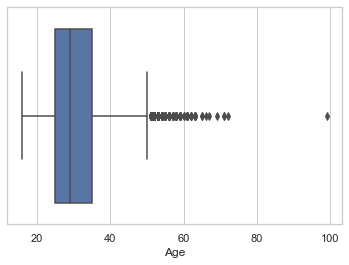

Number of age outliers below Q1 is: 0


In [19]:
# 计算去除异常值前的`ConvertedComp`中位数
median_converted_comp_before = df['ConvertedComp'].median()
print(f"The median ConvertedComp before removing outliers is: {median_converted_comp_before}")

# 计算IQR和确定异常值的界限
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 移除异常值后计算`ConvertedComp`的中位数
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
median_converted_comp_after = df_no_outliers['ConvertedComp'].median()
print(f"The median ConvertedComp after removing outliers is: {median_converted_comp_after}")

# 移除异常值后计算`ConvertedComp`的均值
mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()
print(f"The mean ConvertedComp after removing outliers is: {mean_converted_comp_after}")

# 使用箱形图确定`Age`的异常值数量
import seaborn as sns
sns.boxplot(x=df['Age'])
plt.show()

# 计算低于Q1的`Age`异常值数量
age_Q1 = df['Age'].quantile(0.25)
age_lower_bound = age_Q1 - 1.5 * (df['Age'].quantile(0.75) - age_Q1)
age_outliers_below_Q1 = df[df['Age'] < age_lower_bound].shape[0]
print(f"Number of age outliers below Q1 is: {age_outliers_below_Q1}")


In [21]:
# 计算所有列与'Age'列的相关性
correlation_with_age = df.corr()['Age']

# 找出与'Age'列有负相关性的列
negative_correlations = correlation_with_age[correlation_with_age < 0]


# 计算所有列与'Age'列的相关性，排除'Age'本身
correlation_with_age = df.corr()['Age'].drop('Age')

# 找出与'Age'列有最高相关性的列
highest_correlation_with_age = correlation_with_age.idxmax()

# 打印结果
print("Columns that have a negative correlation with 'Age':")
print(negative_correlations)

print("\nColumn that has the highest correlation with 'Age':")
print(highest_correlation_with_age)


Columns that have a negative correlation with 'Age':
CodeRevHrs   -0.020469
Name: Age, dtype: float64

Column that has the highest correlation with 'Age':
ConvertedComp


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
